In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime
from pyramid.arima import auto_arima

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/alext234/coronavirus-stats/master/data/who-global-cases.csv',index_col=0)

In [3]:
del data['report_url']

In [4]:
data = data[~data.index.duplicated(keep='last')]

In [5]:
data.head()

,global_cases
date,
2020-01-27,2798
2020-01-28,4593
2020-01-29,6065
2020-01-30,7818
2020-01-31,9826


In [6]:
data.tail()

,global_cases
date,
2020-03-13,132758
2020-03-14,142539
2020-03-15,153522
2020-03-16,167511
2020-03-17,179112


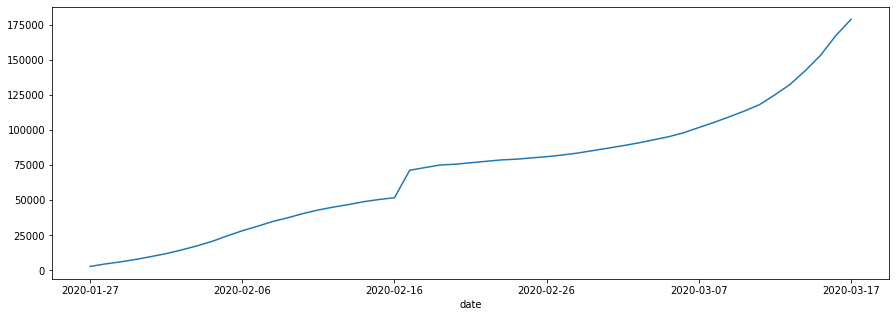

In [7]:
data.global_cases.plot(figsize=(15, 5))

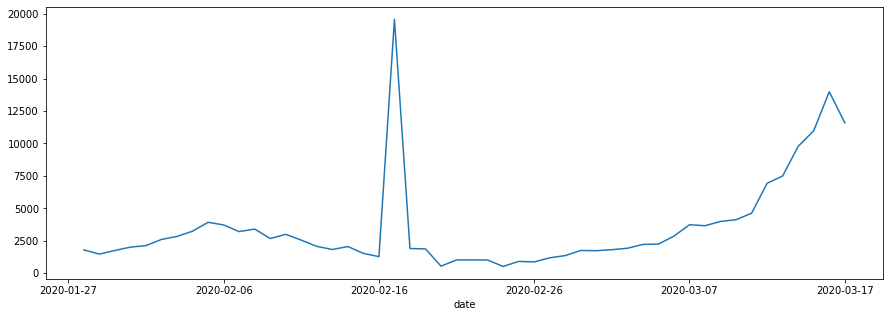

In [8]:
(data.global_cases - data.global_cases.shift(1)).plot(figsize=(15, 5))

In [9]:
predicted_days = 15
firstPredictionDay = datetime.datetime.strptime(data.index[-1], '%Y-%m-%d') + datetime.timedelta(days = 1)

In [10]:
stepwise_model = auto_arima(data.global_cases,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=939.078, BIC=950.429, Fit time=1.046 seconds
Fit ARIMA: order=(0, 2, 0); AIC=948.853, BIC=952.636, Fit time=0.013 seconds
Fit ARIMA: order=(1, 2, 0); AIC=938.062, BIC=943.737, Fit time=0.308 seconds
Fit ARIMA: order=(0, 2, 1); AIC=933.137, BIC=938.813, Fit time=0.280 seconds
Fit ARIMA: order=(1, 2, 1); AIC=935.100, BIC=942.667, Fit time=0.451 seconds
Fit ARIMA: order=(0, 2, 2); AIC=935.101, BIC=942.669, Fit time=0.342 seconds
Fit ARIMA: order=(1, 2, 2); AIC=937.078, BIC=946.538, Fit time=0.604 seconds
Total fit time: 3.085 seconds


In [11]:
stepwise_model.aic()

933.1370584302813

In [12]:
stepwise_model.fit(data.global_cases)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [13]:
future_forecast = stepwise_model.predict(n_periods=predicted_days)

In [14]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(future_forecast[x])))

2020-03-18 - 190590
2020-03-19 - 202267
2020-03-20 - 214144
2020-03-21 - 226219
2020-03-22 - 238493
2020-03-23 - 250967
2020-03-24 - 263639
2020-03-25 - 276511
2020-03-26 - 289581
2020-03-27 - 302851
2020-03-28 - 316319
2020-03-29 - 329987
2020-03-30 - 343854
2020-03-31 - 357919
2020-04-01 - 372184
